<a href="https://colab.research.google.com/github/Nixtla/statsforecast/blob/readme_ets/examples/Forecasting_with_Auto_Arima_%26_ETS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting with Auto Arima & Auto ETS.

In [2]:
!pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from statsforecast import StatsForecast
from statsforecast.models import seasonal_naive, auto_arima, ses
from statsforecast.utils import AirPassengers

In [ ]:
# If you want to list all avaiaible models run this lines
#from statsforecast.models import __all__
#__all__

## Define horizon and split data accordingly

In [4]:
horizon = 12
ap_train = AirPassengers[:-horizon]
ap_test = AirPassengers[-horizon:]


In [5]:
# We define the train df. We use the index functionality to make the training a lot faster. 
series_train = pd.DataFrame(
    {
        'ds': pd.date_range(start='1949-01-01', periods=ap_train.size, freq='M'),
        'y': ap_train
    },
    index=pd.Index([0] * ap_train.size, name='unique_id')
)

In [16]:
#Define the parameters that you want to use in your models. 
season_length=12 
# Note: For all models the following parameters are passed automaticly and don't need to be declared: (X, h, future_xreg)


fcst = StatsForecast(
    series_train, 
    models=[(auto_arima, season_length), (ets, season_lenght)], 
    freq='M', 
    n_jobs=1
)

# For some models like ARIMA , you can easly include confidence intervals
forecasts = fcst.forecast(horizon, level=(80, 95))

# forecasts = fcst.forecast(horizon) # Run this line if you don't want to include levels for ARIMA

/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1563: UserWarning: The chosen seasonal unit root test encountered an error when testing for the 0 difference.
From seas(): module 'statsmodels.tsa.api' has no attribute 'STL'
0 seasonal differences will be used. Consider using a different unit root test.
  f"The chosen seasonal unit root test encountered an error when testing for the {D} difference.\n"
/usr/local/lib/python3.7/dist-packages/statsforecast/arima.py:1612: UserWarning: The chosen unit root test encountered an error when testing for the 0 difference.
From kpss(): kpss() got an unexpected keyword argument 'nlags'
0 differences will be used. Consider using a different unit root test.
  f"The chosen unit root test encountered an error when testing for the {d} difference.\n"
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/usr/local/lib/python3.7/dist-packages/scipy/optimi

In [17]:

forecasts['y_test'] = ap_test


In [22]:
#You analyse see the models that have been trained and the respective values by calling the DF.
forecasts

,ds,auto_arima_season_length-12_mean,auto_arima_season_length-12_lo-95,auto_arima_season_length-12_lo-80,auto_arima_season_length-12_hi-80,auto_arima_season_length-12_hi-95,seasonal_naive_season_length-12,ses_alpha-0.9,y_test
unique_id,,,,,,,,,
0,1960-01-31,423.018127,391.719482,402.553040,443.483185,454.316742,360.0,401.215424,417.0
0,1960-02-29,411.684387,367.607178,382.863861,440.504944,455.761597,342.0,401.215424,391.0
0,1960-03-31,465.904907,412.147461,430.754791,501.055023,519.662354,406.0,401.215424,419.0
0,1960-04-30,458.139801,396.325043,417.721313,498.558319,519.954590,396.0,401.215424,461.0
0,1960-05-31,477.905579,409.082123,432.904327,522.906799,546.729004,420.0,401.215424,472.0
0,1960-06-30,492.665771,417.586243,443.573914,541.757629,567.745300,472.0,401.215424,535.0
0,1960-07-31,543.791077,463.031433,490.985168,596.596985,624.550720,548.0,401.215424,622.0
0,1960-08-31,547.056580,461.077026,490.837555,603.275574,633.036072,559.0,401.215424,606.0
0,1960-09-30,490.147430,399.327515,430.763489,549.531372,580.967346,463.0,401.215424,508.0


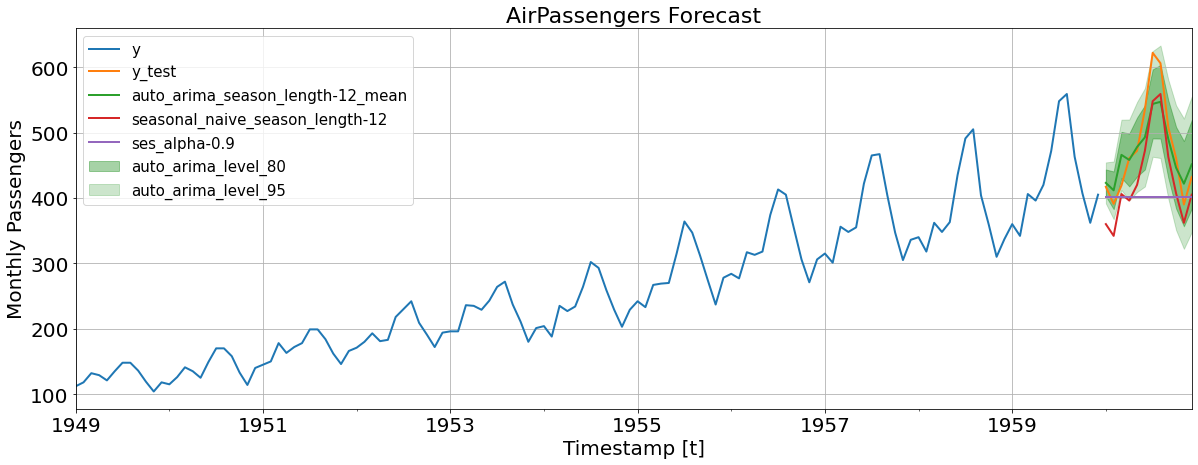

In [20]:
#We are going to plot the models againts the real values of test.

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = pd.concat([series_train, forecasts]).set_index('ds')
df_plot[['y', 'y_test', 'auto_arima_season_length-12_mean','ets_season_lenght-12']].plot(ax=ax, linewidth=2)
ax.fill_between(df_plot.index, 
                df_plot['auto_arima_season_length-12_lo-80'], 
                df_plot['auto_arima_season_length-12_hi-80'],
                alpha=.35,
                color='green',
                label='auto_arima_level_80')
ax.fill_between(df_plot.index, 
                df_plot['auto_arima_season_length-12_lo-95'], 
                df_plot['auto_arima_season_length-12_hi-95'],
                alpha=.2,
                color='green',
                label='auto_arima_level_95')
ax.set_title('AirPassengers Forecast', fontsize=22)
ax.set_ylabel('Monthly Passengers', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

# Adding external regressors
Some models like auto_arima, have the support for external regresors or exogenous variables. We are working to expand this feature to other models.

In [ ]:
# First we are going to include new exogenous variables as columns to our train data_frame. (You can include things like weather or holidays)

series_train['trend'] = np.arange(1, ap_train.size + 1)
series_train['intercept'] = np.ones(ap_train.size)
series_train['month'] = series_train['ds'].dt.month
series_train = pd.get_dummies(series_train, columns=['month'], drop_first=True)

In [ ]:
# We consruct the test DF. We use the index functionality to make it faster.
xreg_test = pd.DataFrame(
    {
        'ds': pd.date_range(start='1960-01-01', periods=ap_test.size, freq='M')
    },
    index=pd.Index([0] * ap_test.size, name='unique_id')
)

In [ ]:
# We construct xreg for test. The train series ends at the 133th step. 

xreg_test['trend'] = np.arange(133, ap_test.size + 133)
xreg_test['intercept'] = np.ones(ap_test.size)
xreg_test['month'] = xreg_test['ds'].dt.month
xreg_test = pd.get_dummies(xreg_test, columns=['month'], drop_first=True)

In [ ]:
#Define the parameters that you want to use in your models. 
season_length=12

# Note: For all models the following parameters are passed automaticly and don't need to be declared: (X, h, future_xreg)

fcst = StatsForecast(
    series_train, 
    models=[(auto_arima, season_length), (seasonal_naive, season_length)], 
    freq='M', 
    n_jobs=1
)

# Include levels for auto_arima
forecasts = fcst.forecast(horizon, level=(80, 95))

In [ ]:
forecasts['y_test'] = ap_test